In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filtrando os dados

In [2]:
tennis_df = pd.read_csv("https://raw.githubusercontent.com/Dieg0Dev/datasets/main/atp_tennis.csv")
tennis_df['Date'] = pd.to_datetime(tennis_df['Date'], errors='coerce')

year = 2023
tennis_df = tennis_df[tennis_df['Date'].dt.year == year]

grand_slams = tennis_df[tennis_df['Series'] == 'Grand Slam']
australian_open = tennis_df[tennis_df['Tournament'] == 'Australian Open']
french_open = tennis_df[tennis_df['Tournament'] == 'French Open']
wimbledon = tennis_df[tennis_df['Tournament'] == 'Wimbledon']
us_open = tennis_df[tennis_df['Tournament'] == 'US Open']

torneio = wimbledon
torneio

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
60440,Wimbledon,2023-07-03,Grand Slam,Outdoor,Grass,1st Round,5,Barrios M.,Baez S.,Barrios M.,133,46,456,955,2.10,1.73,7-6 3-6 6-3 7-6
60441,Wimbledon,2023-07-03,Grand Slam,Outdoor,Grass,1st Round,5,Varillas J.P.,Musetti L.,Musetti L.,63,16,806,2210,10.00,1.06,3-6 1-6 5-7
60442,Wimbledon,2023-07-03,Grand Slam,Outdoor,Grass,1st Round,5,Karatsev A.,Van Assche L.,Karatsev A.,50,75,888,758,1.73,2.10,6-7 6-4 6-2 6-4
60443,Wimbledon,2023-07-03,Grand Slam,Outdoor,Grass,1st Round,5,Nakashima B.,Thompson J.,Thompson J.,55,70,855,769,1.91,1.91,6-2 6-2 4-6 6-7 3-6
60444,Wimbledon,2023-07-03,Grand Slam,Outdoor,Grass,1st Round,5,Rublev A.,Purcell M.,Rublev A.,7,64,4255,796,1.06,10.00,6-3 7-5 6-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60561,Wimbledon,2023-07-12,Grand Slam,Outdoor,Grass,Quarterfinals,5,Eubanks C.,Medvedev D.,Medvedev D.,43,3,976,5890,5.00,1.17,4-6 6-1 6-4 6-7 1-6
60562,Wimbledon,2023-07-12,Grand Slam,Outdoor,Grass,Quarterfinals,5,Alcaraz C.,Rune H.,Alcaraz C.,1,6,7675,4510,1.22,4.33,7-6 6-4 6-4
60563,Wimbledon,2023-07-14,Grand Slam,Outdoor,Grass,Semifinals,5,Sinner J.,Djokovic N.,Djokovic N.,8,2,3345,7595,4.50,1.20,3-6 4-6 6-7
60564,Wimbledon,2023-07-14,Grand Slam,Outdoor,Grass,Semifinals,5,Alcaraz C.,Medvedev D.,Alcaraz C.,1,3,7675,5890,1.36,3.20,6-3 6-3 6-3


## Criando rede para o torneio

In [3]:
G = nx.DiGraph() # Criando grafo direcionado

for index, row in torneio.iterrows():
    player1 = row['Player_1']
    player2 = row['Player_2']
    winner = row['Winner']
    
    if player1 == winner: 
        G.add_edge(player1, player2)
    else:
        G.add_edge(player2, player1)

In [4]:
from pyvis.network import Network
from IPython.display import HTML, display
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", directed=True)

net.from_nx(G)

#net.show_buttons(filter_=['nodes', 'edges', 'physics'])
net.write_html('example.html')
with open('example.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

display(HTML(html_content))

## Filtrando as fases finais

In [5]:
fases_finais = ['4th Round', 'Quarterfinals', 'Semifinals', 'The Final']
finais_df = torneio[torneio['Round'].isin(fases_finais)]
finais_df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
60552,Wimbledon,2023-07-09,Grand Slam,Outdoor,Grass,4th Round,5,Rublev A.,Bublik A.,Rublev A.,7,26,4255,1354,1.80,2.00,7-5 6-3 6-7 6-7 6-4
60553,Wimbledon,2023-07-09,Grand Slam,Outdoor,Grass,4th Round,5,Shapovalov D.,Safiullin R.,Safiullin R.,29,92,1335,663,1.57,2.38,6-3 3-6 1-6 3-6
60554,Wimbledon,2023-07-09,Grand Slam,Outdoor,Grass,4th Round,5,Sinner J.,Galan D.E.,Sinner J.,8,85,3345,693,1.04,13.00,7-6 6-4 6-3
60555,Wimbledon,2023-07-10,Grand Slam,Outdoor,Grass,4th Round,5,Tsitsipas S.,Eubanks C.,Eubanks C.,5,43,4670,976,1.36,3.20,6-3 6-7 6-3 4-6 4-6
60556,Wimbledon,2023-07-10,Grand Slam,Outdoor,Grass,4th Round,5,Djokovic N.,Hurkacz H.,Djokovic N.,2,18,7595,2060,1.05,11.00,7-6 7-6 5-7 6-4
60557,Wimbledon,2023-07-10,Grand Slam,Outdoor,Grass,4th Round,5,Dimitrov G.,Rune H.,Rune H.,24,6,1430,4510,1.57,2.38,6-3 6-7 6-7 3-6
60558,Wimbledon,2023-07-10,Grand Slam,Outdoor,Grass,4th Round,5,Alcaraz C.,Berrettini M.,Alcaraz C.,1,38,7675,1082,1.40,3.00,3-6 6-3 6-3 6-3
60559,Wimbledon,2023-07-11,Grand Slam,Outdoor,Grass,Quarterfinals,5,Safiullin R.,Sinner J.,Sinner J.,92,8,663,3345,5.50,1.14,4-6 6-3 2-6 2-6
60560,Wimbledon,2023-07-11,Grand Slam,Outdoor,Grass,Quarterfinals,5,Djokovic N.,Rublev A.,Djokovic N.,2,7,7595,4255,1.07,9.00,4-6 6-1 6-4 6-3
60561,Wimbledon,2023-07-12,Grand Slam,Outdoor,Grass,Quarterfinals,5,Eubanks C.,Medvedev D.,Medvedev D.,43,3,976,5890,5.00,1.17,4-6 6-1 6-4 6-7 1-6


## Criando rede para as fases finais do torneio

In [6]:
G2 = nx.DiGraph() 

for index, row in finais_df.iterrows():
    player1 = row['Player_1']
    player2 = row['Player_2']
    winner = row['Winner']
    
    if player1 == winner: 
        G2.add_edge(player1, player2)
    else:
        G2.add_edge(player2, player1)

## Matriz de adjacência das fases finais do torneio

In [7]:
labels = list(G2.nodes())
adj_matrix = nx.adjacency_matrix(G2).todense()
df = pd.DataFrame(adj_matrix, index=labels, columns=labels)
df

,Rublev A.,Bublik A.,Safiullin R.,Shapovalov D.,Sinner J.,Galan D.E.,Eubanks C.,Tsitsipas S.,Djokovic N.,Hurkacz H.,Rune H.,Dimitrov G.,Alcaraz C.,Berrettini M.,Medvedev D.
Rublev A.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Bublik A.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Safiullin R.,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Shapovalov D.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sinner J.,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
Galan D.E.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Eubanks C.,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Tsitsipas S.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Djokovic N.,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
Hurkacz H.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Matriz de adjacência do torneio

In [8]:
labels = list(G.nodes())
adj_matrix = nx.adjacency_matrix(G).todense()
df = pd.DataFrame(adj_matrix, index=labels, columns=labels)
print("Matriz de Adjacência com Rótulos dos Nós:")
df

Matriz de Adjacência com Rótulos dos Nós:


,Barrios M.,Baez S.,Musetti L.,Varillas J.P.,Karatsev A.,Van Assche L.,Thompson J.,Nakashima B.,Rublev A.,Purcell M.,...,O Connell C.,Medjedovic H.,De Minaur A.,Coppejans K.,Kubler J.,Humbert U.,Jarry N.,Cecchinato M.,Berrettini M.,Sonego L.
Barrios M.,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Baez S.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Musetti L.,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Varillas J.P.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Karatsev A.,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Humbert U.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jarry N.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
Cecchinato M.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berrettini M.,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Criando rede de todos os grand slans do ano definido

In [9]:
G3 = nx.DiGraph()

for index, row in grand_slams.iterrows():
    player1 = row['Player_1']
    player2 = row['Player_2']
    winner = row['Winner']
    
    if player1 == winner: 
        G3.add_edge(player1, player2)
    else:
        G3.add_edge(player2, player1)

## Detectando componentes conexos da rede de todos os grand slans

In [10]:
components = list(nx.strongly_connected_components(G3))
subgraphs = []
for component in components:
    subgraph = G3.subgraph(component).copy()  

    if len(subgraph) > 1:
        diameter = nx.diameter(subgraph)
        periphery = nx.periphery(subgraph)
        
        subgraphs.append({
            'nodes': component,
            'subgraph': subgraph,
            'diameter': diameter,
            'periphery': periphery
        })
        
        print(f"Componente {component}:")
        print(f" Diâmetro: {diameter}")
        print(f" Periferia: {periphery}")

componente_conexo = subgraphs[0]['subgraph']

Componente {'Ymer M.', 'Evans D.', 'Fritz T.', 'Korda S.', 'Dimitrov G.', 'Shapovalov D.', 'Thiem D.', 'Wolf J.J.', 'Nishioka Y.', 'Wawrinka S.', 'Vukic A.', 'Galan D.E.', 'Van De Zandschulp B.', 'Shelton B.', 'De Minaur A.', 'Alcaraz C.', 'Sinner J.', 'Ruud C.', 'Stricker D.', 'Tirante T.A.', 'Mmoh M.', 'Sonego L.', 'Holt B.', 'Nadal R.', 'Kubler J.', 'Khachanov K.', 'Auger-Aliassime F.', 'Hsu Y.', 'Mayot H.', 'Barrere G.', 'Molcan A.', 'Zverev A.', 'Bonzi B.', 'Safiullin R.', 'Zeppieri G.', 'Fucsovics M.', 'Murray A.', 'Paul T.', 'Coric B.', 'Giron M.', 'Seyboth Wild T.', 'Berrettini M.', 'Mensik J.', 'Daniel T.', 'Hijikata R.', 'Carballes Baena R.', 'Humbert U.', 'Davidovich Fokina A.', 'Varillas J.P.', 'O Connell C.', 'Marterer M.', 'Bublik A.', 'Eubanks C.', 'Griekspoor T.', 'Bautista Agut R.', 'Tiafoe F.', 'Hurkacz H.', 'Vesely J.', 'Fognini F.', 'Djokovic N.', 'Kudla D.', 'Harris L.', 'Arnaldi M.', 'Rune H.', 'Zhang Zh.', 'Lehecka J.', 'Gojo B.', 'Mcdonald M.', 'Draper J.', 'Kok

## Calculando densidade das redes

In [11]:
density = nx.density(G)
print("Densidade do torneio:", density)
density2 = nx.density(G2)
print("Densidade das finais do torneio:", density2)
density3 = nx.density(G3)
print("Densidade dos grand slans:", density3)

Densidade do torneio: 0.007750984251968504
Densidade das finais do torneio: 0.06666666666666667
Densidade dos grand slans: 0.013419674841554147


## Calculando assortatividade

In [12]:
import networkx as nx
import pandas as pd

def categorize_ranking(rank):
    if rank <= 50:
        return '1-50'
    elif rank <= 100:
        return '51-100'
    elif rank <= 150:
        return '101-150'
    else:
        return '151+'

G_1 = nx.Graph()

# Iterando pelas linhas do DataFrame para adicionar os nós e arestas
for index, row in torneio.iterrows():
    player1 = row['Player_1']
    player2 = row['Player_2']
    
    # Adicionando nós (jogadores) ao grafo, se ainda não estiverem presentes
    if player1 not in G_1:
        G_1.add_node(player1, rank_group=categorize_ranking(row['Rank_1']))
    if player2 not in G_1:
        G_1.add_node(player2, rank_group=categorize_ranking(row['Rank_2']))
    
    # Adicionando a aresta entre os jogadores
    G_1.add_edge(player1, player2)

# Calculando a assortatividade com base nos grupos de ranking
assortativity = nx.attribute_assortativity_coefficient(G_1, 'rank_group')
print(f'Assortatividade da rede baseada nos grupos de ranking: {assortativity}')

Assortatividade da rede baseada nos grupos de ranking: -0.0013083296990841278


## Histograma

Número de arestas no grafo: 126


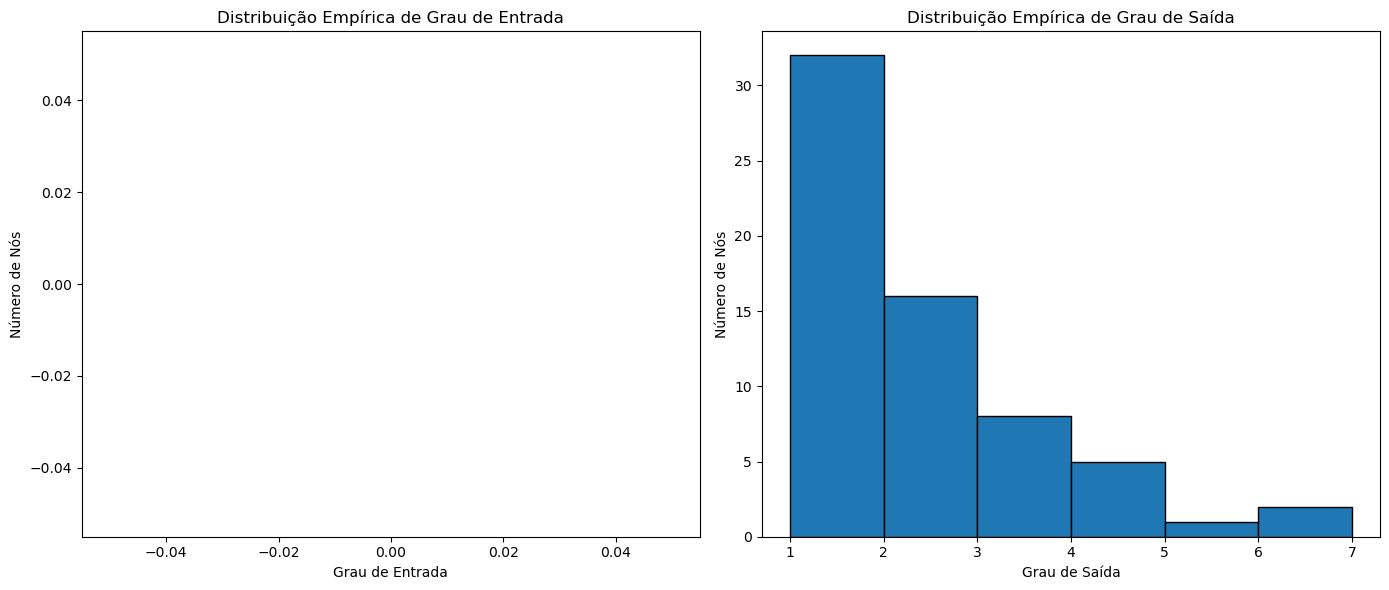

In [13]:
# Verificar número de arestas
print("Número de arestas no grafo:", G.number_of_edges())

# Calcular e imprimir graus
in_degrees = list(G.in_degree())
out_degrees = list(G.out_degree())

#print("Exemplos de graus de entrada:", in_degrees)
#print("Exemplos de graus de saída:", out_degrees)

# Preparar dados para os histogramas
in_degree_values = [degree for node, degree in in_degrees]
out_degree_values = [degree for node, degree in out_degrees]

# Ajustar os bins para incluir todos os graus possíveis
bins_in = range(1, max(in_degree_values) + 1) if in_degree_values else [0]
bins_out = range(1, max(out_degree_values) + 1) if out_degree_values else [0]

# Plotar o histograma da distribuição de grau de entrada
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(in_degree_values, bins=bins_in, edgecolor='black')
plt.xlabel('Grau de Entrada')
plt.ylabel('Número de Nós')
plt.title('Distribuição Empírica de Grau de Entrada')

# Plotar o histograma da distribuição de grau de saída
plt.subplot(1, 2, 2)
plt.hist(out_degree_values, bins=bins_out, edgecolor='black')
plt.xlabel('Grau de Saída')
plt.ylabel('Número de Nós')
plt.title('Distribuição Empírica de Grau de Saída')

plt.tight_layout()
plt.show()

# Clustering Local:

In [14]:
jogadores = [
    'Djokovic N.',
    'Alcaraz C.',
    'Ruud C.',
    'Medvedev D.',
    'Rublev A.',
    'Shelton B.',
    'Zverev A.',
    'Sinner J.',
    'Rune H.',
    'Fritz T.'
]
for jogador in jogadores: 
    clustering_local = nx.clustering(G3, jogador)
    print(f"Coeficiente de Clustering Local para {jogador}: {clustering_local}")

Coeficiente de Clustering Local para Djokovic N.: 0.04
Coeficiente de Clustering Local para Alcaraz C.: 0.04304635761589404
Coeficiente de Clustering Local para Ruud C.: 0
Coeficiente de Clustering Local para Medvedev D.: 0.052884615384615384
Coeficiente de Clustering Local para Rublev A.: 0.01838235294117647
Coeficiente de Clustering Local para Shelton B.: 0.05844155844155844
Coeficiente de Clustering Local para Zverev A.: 0.04285714285714286
Coeficiente de Clustering Local para Sinner J.: 0.0375
Coeficiente de Clustering Local para Rune H.: 0
Coeficiente de Clustering Local para Fritz T.: 0.022727272727272728


# Clustering Global:

In [15]:
clustering_global = nx.average_clustering(G3)
print(f"Coeficiente de Clustering Global: {clustering_global}")

Coeficiente de Clustering Global: 0.027130451292811046


# Componentes Fortemente Conexos

In [16]:
componentes_fortemente_conectados = list(nx.strongly_connected_components(G))
print(f"Componentes Fortemente Conectados: {componentes_fortemente_conectados}")

Componentes Fortemente Conectados: [{'Baez S.'}, {'Barrios M.'}, {'Varillas J.P.'}, {'Isner J.'}, {'Munar J.'}, {'Musetti L.'}, {'Van Assche L.'}, {'Karatsev A.'}, {'Nakashima B.'}, {'Thompson J.'}, {'Purcell M.'}, {'Marozsan F.'}, {'Goffin D.'}, {'Mcdonald M.'}, {'Couacaud E.'}, {'Wolf J.J.'}, {'Gojo B.'}, {'Auger-Aliassime F.'}, {'Mmoh M.'}, {'Marterer M.'}, {'Bublik A.'}, {'Rublev A.'}, {'Ramos-Vinolas A.'}, {'Lajovic D.'}, {'Choinski J.'}, {'Hurkacz H.'}, {'Cachin P.'}, {'Ruusuvuori E.'}, {'Zapata Miralles B.'}, {'Etcheverry T.'}, {'Wawrinka S.'}, {'Cerundolo J.M.'}, {'Kecmanovic M.'}, {'Schwartzman D.'}, {'Evans D.'}, {'Altmaier D.'}, {'Vukic A.'}, {'Halys Q.'}, {'Nishioka Y.'}, {'Koepfer D.'}, {'Otte O.'}, {'Molcan A.'}, {'Hanfmann Y.'}, {'Fritz T.'}, {'Ymer M.'}, {'Galan D.E.'}, {'Bautista Agut R.'}, {'Gasquet R.'}, {'Moutet C.'}, {'Coric B.'}, {'Bonzi B.'}, {'Mayot H.'}, {'Pella G.'}, {'Albot R.'}, {'Harris L.'}, {'Barrere G.'}, {'Lestienne C.'}, {'Lokoli L.'}, {'Ruud C.'}, {'B

# Componentes Fracamente Conexos

In [17]:
componentes_fracamente_conectados = list(nx.weakly_connected_components(G3))
print(f"Componentes Fracamente Conectados: {componentes_fracamente_conectados}")

Componentes Fracamente Conectados: [{'Ymer M.', 'Evans D.', 'Fritz T.', 'Korda S.', 'Dimitrov G.', 'Mpetshi G.', 'Gaston H.', 'Shapovalov D.', 'Thiem D.', 'Couacaud E.', 'Wolf J.J.', 'Svrcina D.', 'Monteiro T.', 'Johnson S.', 'Nishioka Y.', 'Cobolli F.', 'Cazaux A.', 'Wawrinka S.', 'Vukic A.', 'Gasquet R.', 'Galan D.E.', 'Diaz Acosta F.', 'Kypson P.', 'Krutykh O.', 'Paire B.', 'Van De Zandschulp B.', 'Shelton B.', 'De Minaur A.', 'Borges N.', 'Nakashima B.', 'Shang J.', 'Alcaraz C.', 'Coppejans K.', 'Sinner J.', 'Stricker D.', 'Ruud C.', 'Garin C.', 'Wu Y.', 'Vavassori A.', 'Tirante T.A.', 'Novak D.', 'Pospisil V.', 'Mmoh M.', 'Coria F.', 'Kwon S.W.', 'Sonego L.', 'Sousa J.', 'Holt B.', 'Martinez P.', 'Michelsen A.', 'Nadal R.', 'Svajda Z.', 'Basilashvili N.', 'Brouwer G.', 'Kubler J.', 'Ymer E.', 'Khachanov K.', 'Auger-Aliassime F.', 'Hsu Y.', 'Mayot H.', 'Barrere G.', 'Edmund K.', 'Muller A.', 'Molcan A.', 'Zverev A.', 'Cerundolo J.M.', 'Bonzi B.', 'Van Assche L.', 'Otte O.', 'Safiul

In [18]:
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("O cálculo da centralidade do autovetor falhou em convergir. Tente ajustar os parâmetros ou verifique se o grafo é conexo.")
    eigenvector_centrality = None

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Encontrar os 5 nós mais importantes em cada medida de centralidade (se o cálculo de eigenvector foi bem-sucedido)
if eigenvector_centrality:
    top_5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print("Top 5 jogadores - Eigenvector Centrality:") # 
    for player, score in top_5_eigenvector:
        print(f"{player}: {score:.4f}")
else:
    print("Eigenvector Centrality não foi calculado devido à falta de convergência.")

print("\nTop 5 jogadores - Degree Centrality:")
top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for player, score in top_5_degree:
    print(f"{player}: {score:.4f}")

print("\nTop 5 jogadores - Closeness Centrality:")
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for player, score in top_5_closeness:
    print(f"{player}: {score:.4f}")

print("\nTop 5 jogadores - Betweenness Centrality:")
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for player, score in top_5_betweenness:
    print(f"{player}: {score:.4f}")

Top 5 jogadores - Eigenvector Centrality:
Lokoli L.: 0.9996
Auger-Aliassime F.: 0.0109
Lestienne C.: 0.0109
Ruud C.: 0.0109
Harris L.: 0.0109

Top 5 jogadores - Degree Centrality:
Djokovic N.: 0.0551
Alcaraz C.: 0.0551
Sinner J.: 0.0472
Rublev A.: 0.0394
Medvedev D.: 0.0394

Top 5 jogadores - Closeness Centrality:
Lokoli L.: 0.0138
Auger-Aliassime F.: 0.0135
Lestienne C.: 0.0135
Ruud C.: 0.0135
Harris L.: 0.0135

Top 5 jogadores - Betweenness Centrality:
Djokovic N.: 0.0039
Sinner J.: 0.0039
Safiullin R.: 0.0028
Rublev A.: 0.0019
Eubanks C.: 0.0019


Top 5 jogadores - Eigenvector Centrality:
Lokoli L.: 0.9996
Auger-Aliassime F.: 0.0109
Lestienne C.: 0.0109
Ruud C.: 0.0109
Harris L.: 0.0109


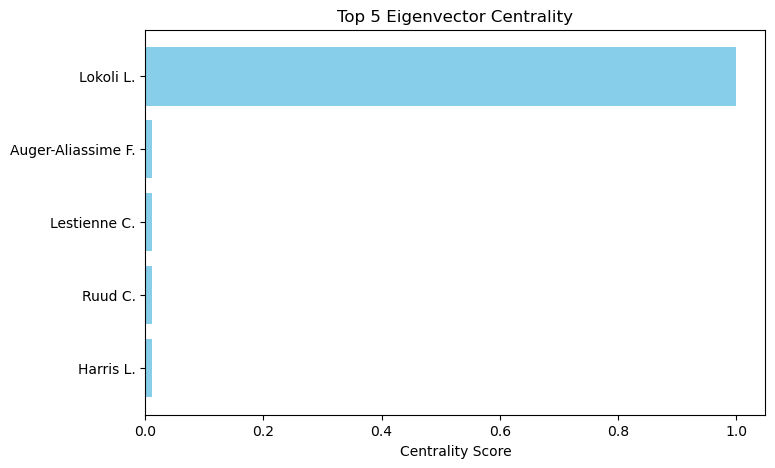


Top 5 jogadores - Degree Centrality:
Djokovic N.: 0.0551
Alcaraz C.: 0.0551
Sinner J.: 0.0472
Rublev A.: 0.0394
Medvedev D.: 0.0394


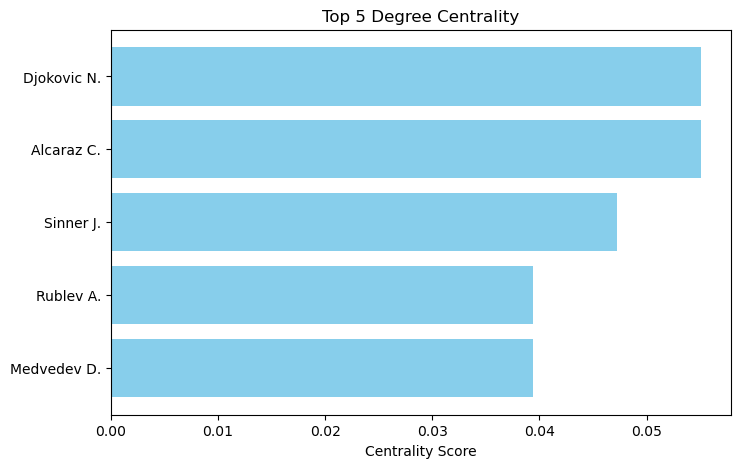


Top 5 jogadores - Closeness Centrality:
Lokoli L.: 0.0138
Auger-Aliassime F.: 0.0135
Lestienne C.: 0.0135
Ruud C.: 0.0135
Harris L.: 0.0135


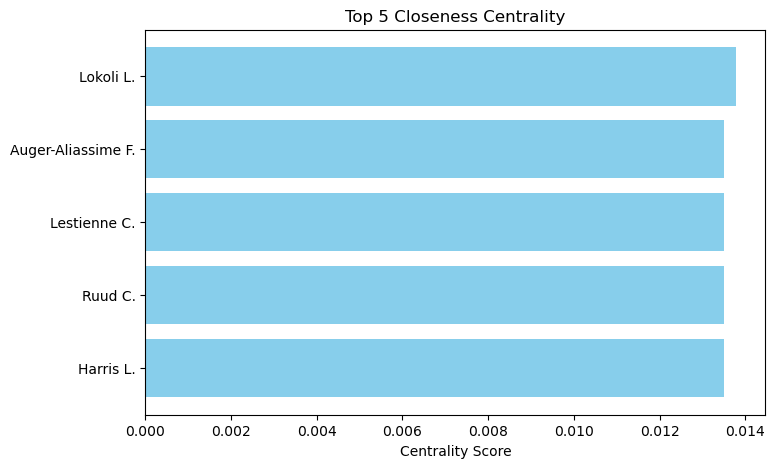


Top 5 jogadores - Betweenness Centrality:
Djokovic N.: 0.0039
Sinner J.: 0.0039
Safiullin R.: 0.0028
Rublev A.: 0.0019
Eubanks C.: 0.0019


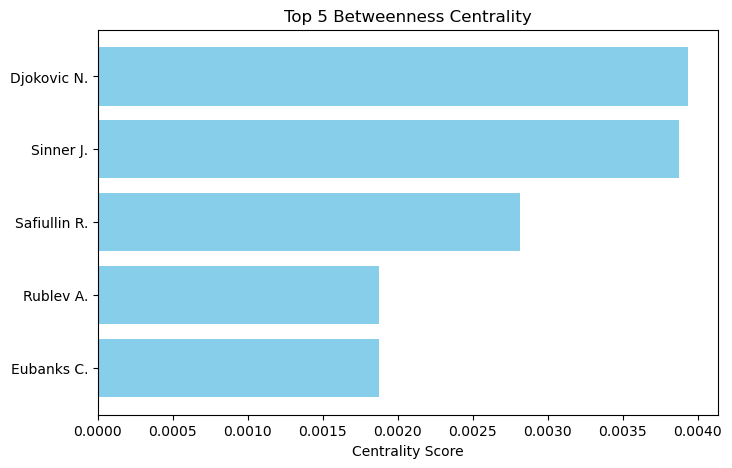

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

# Calcular as centralidades
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("O cálculo da centralidade do autovetor falhou em convergir. Tente ajustar os parâmetros ou verifique se o grafo é conexo.")
    eigenvector_centrality = None

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Função para gerar gráfico de barras
def plot_centrality_bars(top_players, title):
    players = [player for player, score in top_players]
    scores = [score for player, score in top_players]

    plt.figure(figsize=(8, 5))
    plt.barh(players, scores, color='skyblue')
    plt.xlabel('Centrality Score')
    plt.title(title)
    plt.gca().invert_yaxis()  # Inverte o eixo y para ter o maior valor no topo
    plt.show()

# Mostrar os 5 principais jogadores em cada centralidade e gerar gráficos de barras
if eigenvector_centrality:
    top_5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print("Top 5 jogadores - Eigenvector Centrality:")
    for player, score in top_5_eigenvector:
        print(f"{player}: {score:.4f}")
    plot_centrality_bars(top_5_eigenvector, "Top 5 Eigenvector Centrality")
else:
    print("Eigenvector Centrality não foi calculado devido à falta de convergência.")

print("\nTop 5 jogadores - Degree Centrality:")
top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for player, score in top_5_degree:
    print(f"{player}: {score:.4f}")
plot_centrality_bars(top_5_degree, "Top 5 Degree Centrality")

print("\nTop 5 jogadores - Closeness Centrality:")
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for player, score in top_5_closeness:
    print(f"{player}: {score:.4f}")
plot_centrality_bars(top_5_closeness, "Top 5 Closeness Centrality")

print("\nTop 5 jogadores - Betweenness Centrality:")
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for player, score in top_5_betweenness:
    print(f"{player}: {score:.4f}")
plot_centrality_bars(top_5_betweenness, "Top 5 Betweenness Centrality")

### Convertendo o grafo dos grand slam para não direcionado

In [19]:
G3_ND = G3.to_undirected()
import community as community_louvain

# Aplicar o algoritmo de Louvain no grafo dos grand slams
partition = community_louvain.best_partition(G3_ND)

# Detecção de comunidades/partições

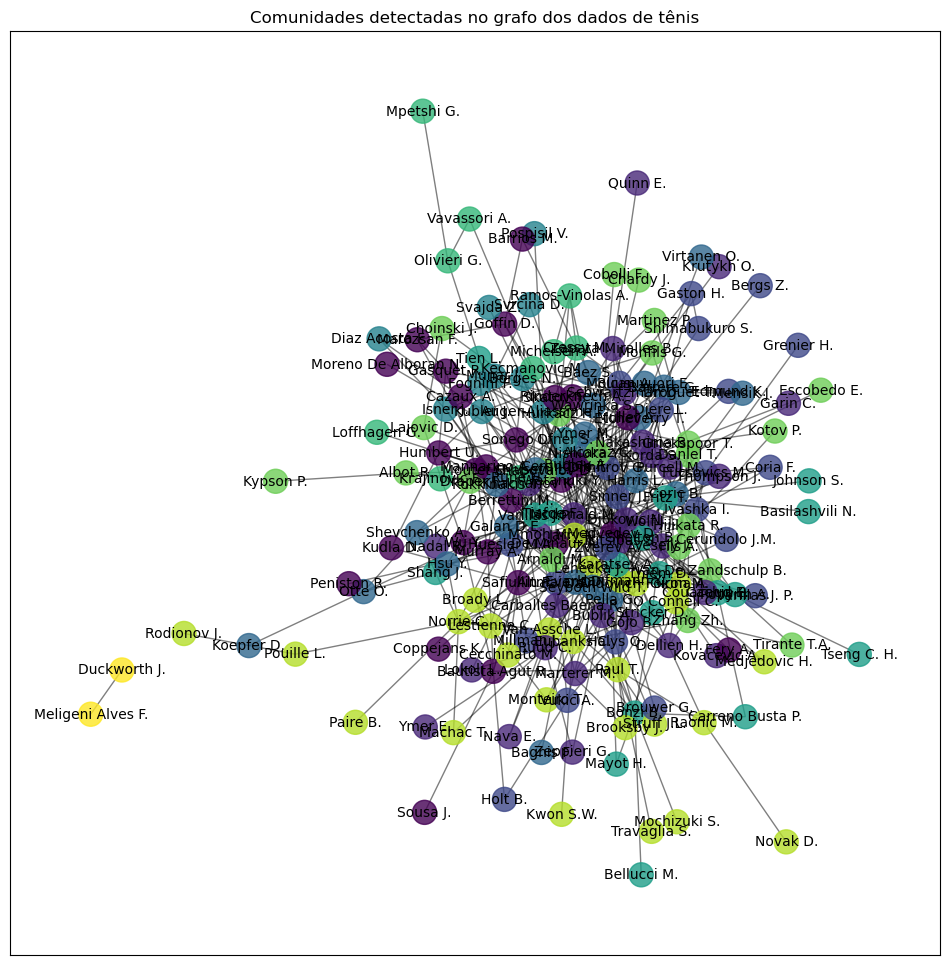

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain

# Detectar comunidades no grafo não direcionado
partition = community_louvain.best_partition(G3_ND)

# Ajustar o layout para maior separação das comunidades
pos = nx.spring_layout(G3_ND, k=0.3, iterations=100)

# Definir o mapa de cores
cmap = plt.get_cmap("viridis")

# Desenhar o grafo com as comunidades
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G3_ND, pos, node_size=300, cmap=cmap, 
                       node_color=list(partition.values()), alpha=0.8)
nx.draw_networkx_edges(G3_ND, pos, alpha=0.5)
nx.draw_networkx_labels(G3_ND, pos, font_size=10, font_color="black")
plt.title("Comunidades detectadas no grafo dos dados de tênis")
plt.show()

In [21]:
# Calcular a centralidade dos nós
centrality = nx.betweenness_centrality(G3_ND)

ranking_dict = {}
for _, row in grand_slams.iterrows():
    player1, rank1 = row['Player_1'], row['Rank_1']
    player2, rank2 = row['Player_2'], row['Rank_2']
    if player1 not in ranking_dict or ranking_dict[player1] > rank1:
        ranking_dict[player1] = rank1
    if player2 not in ranking_dict or ranking_dict[player2] > rank2:
        ranking_dict[player2] = rank2

# Ordenar os nós por centralidade dentro de cada comunidade
community_centrality = {comm: [] for comm in set(partition.values())}
for node, comm in partition.items():
    community_centrality[comm].append((node, centrality[node]))

# Exibir os principais membros de cada comunidade
for comm, nodes in community_centrality.items():
    nodes.sort(key=lambda x: x[1], reverse=True)
    print(f"Comunidade {comm}:")
    for node, centrality_value in nodes[:4]: 
        print(f"  {node} com centralidade {centrality_value}")

Comunidade 0:
  Rublev A. com centralidade 0.06648979045373067
  Medvedev D. com centralidade 0.05714998587350581
  De Minaur A. com centralidade 0.04724777649216771
  Sonego L. com centralidade 0.02268993060962607
Comunidade 1:
  Djokovic N. com centralidade 0.1492248641632863
  Tsitsipas S. com centralidade 0.07237752257515062
  Ruud C. com centralidade 0.05235822765667103
  Khachanov K. com centralidade 0.037869185718207896
Comunidade 2:
  Zverev A. com centralidade 0.05664222012707532
  Sinner J. com centralidade 0.05391942632710064
  Dimitrov G. com centralidade 0.03906634742404708
  Fucsovics M. com centralidade 0.027727049958099843
Comunidade 3:
  Musetti L. com centralidade 0.029543951396322706
  Etcheverry T. com centralidade 0.023689739190989243
  Nishioka Y. com centralidade 0.02174713404812351
  Evans D. com centralidade 0.0213636423037598
Comunidade 4:
  Cerundolo F. com centralidade 0.03764233205523618
  Auger-Aliassime F. com centralidade 0.01926952705781876
  Kubler J. 

## Centralidade X Ranking

In [22]:
# Detectar comunidades no grafo não-direcionado
partition = community_louvain.best_partition(G3_ND)

# Calcular a centralidade dos nós
centrality = nx.betweenness_centrality(G3_ND)

# Exibir os principais membros de cada comunidade com centralidade e ranking
community_centrality_ranking = {comm: [] for comm in set(partition.values())}

for node, comm in partition.items():
    ranking = ranking_dict.get(node, "N/A")  # Se não houver ranking, exibir "N/A"
    community_centrality_ranking[comm].append((node, centrality[node], ranking))

# Exibir os principais membros de cada comunidade com centralidade e ranking
for comm, nodes in community_centrality_ranking.items():
    nodes.sort(key=lambda x: x[1], reverse=True)  # Ordenar pela centralidade
    print(f"Comunidade {comm + 1}:")
    for node, centrality_value, ranking in nodes[:8]:  # Mostrar os 4 principais de cada comunidade
        print(f"  {node} com centralidade {centrality_value:.4f} e ranking {ranking}")

Comunidade 1:
  Rublev A. com centralidade 0.0665 e ranking 6
  Moutet C. com centralidade 0.0128 e ranking 61
  Goffin D. com centralidade 0.0092 e ranking 111
  Coric B. com centralidade 0.0092 e ranking 14
  Cachin P. com centralidade 0.0089 e ranking 58
  Baez S. com centralidade 0.0081 e ranking 32
  Thiem D. com centralidade 0.0024 e ranking 81
  Monfils G. com centralidade 0.0018 e ranking 162
Comunidade 2:
  Hurkacz H. com centralidade 0.0517 e ranking 11
  Davidovich Fokina A. com centralidade 0.0226 e ranking 21
  Varillas J.P. com centralidade 0.0209 e ranking 63
  Bautista Agut R. com centralidade 0.0207 e ranking 23
  Griekspoor T. com centralidade 0.0138 e ranking 24
  Zhang Zh. com centralidade 0.0100 e ranking 52
  Wu Y. com centralidade 0.0086 e ranking 54
  Van De Zandschulp B. com centralidade 0.0084 e ranking 31
Comunidade 3:
  Zverev A. com centralidade 0.0566 e ranking 12
  Sinner J. com centralidade 0.0539 e ranking 6
  Schwartzman D. com centralidade 0.0206 e ra